# Homework 7
- By: Deana Moghaddas
- November 25th, 2020
- I affirm that I personally wrote the text, code, and comments in this homework assignment

In [1]:
import urllib
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np

#load the data
url = 'https://philchodrow.github.io/PIC16A/content/IO_and_modules/IO/palmer_penguins.csv'
filedata = urllib.request.urlopen(url)
with open('penguins.csv', 'wb') as f:
    f.write(filedata.read())


In [2]:
penguins = pd.read_csv("penguins.csv") #read in penguin data
penguins = penguins[["Species", "Flipper Length (mm)", "Body Mass (g)", "Sex"]] #index 4 columns
penguins = penguins.dropna() #drop all rows with missing information
penguins

,Species,Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),195.0,3250.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),193.0,3450.0,FEMALE
5,Adelie Penguin (Pygoscelis adeliae),190.0,3650.0,MALE
...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),214.0,4925.0,FEMALE
340,Gentoo penguin (Pygoscelis papua),215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),212.0,5200.0,FEMALE


I loaded the data and indexed the data frame to only include my columns of interest; Species, Flipper Length, Body Mass and Sex. I then dropped all rows with missing information so that I don't encounter any issues with them down the line.

In [3]:
from sklearn.model_selection import train_test_split

X = penguins.drop(["Species"], axis = 1) #contain predictor variables - all columns but 'Species'
y = penguins["Species"] #contain target variable - 'Species' column
X, y

(     Flipper Length (mm)  Body Mass (g)     Sex
 0                  181.0         3750.0    MALE
 1                  186.0         3800.0  FEMALE
 2                  195.0         3250.0  FEMALE
 4                  193.0         3450.0  FEMALE
 5                  190.0         3650.0    MALE
 ..                   ...            ...     ...
 338                214.0         4925.0  FEMALE
 340                215.0         4850.0  FEMALE
 341                222.0         5750.0    MALE
 342                212.0         5200.0  FEMALE
 343                213.0         5400.0    MALE
 
 [334 rows x 3 columns],
 0      Adelie Penguin (Pygoscelis adeliae)
 1      Adelie Penguin (Pygoscelis adeliae)
 2      Adelie Penguin (Pygoscelis adeliae)
 4      Adelie Penguin (Pygoscelis adeliae)
 5      Adelie Penguin (Pygoscelis adeliae)
                       ...                 
 338      Gentoo penguin (Pygoscelis papua)
 340      Gentoo penguin (Pygoscelis papua)
 341      Gentoo penguin (Pygosce

To train my model, I first need to split my dataset into "predictor" and "target" variables. Predictor variables are the information my model uses to make the predictions, which are the target variables. Hence, because I am trying to predict Species, I index my dataframe to only include the "Species" column for my target variable and include every column but the "Species" column for my predictor variables.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #80% of data allocated to training, 20% to testing: split both X and y (predictor and target variables)
X_train, X_test, y_train, y_test
X_test

,Flipper Length (mm),Body Mass (g),Sex
67,188.0,4100.0,MALE
1,186.0,3800.0,FEMALE
303,224.0,5350.0,MALE
130,190.0,3325.0,FEMALE
341,222.0,5750.0,MALE
...,...,...,...
101,203.0,4725.0,MALE
55,191.0,3700.0,MALE
314,214.0,4850.0,FEMALE
312,212.0,4750.0,FEMALE


To train and test my model, I need to split my predictor variable dataframe and target variable dataframe into training and testing datasets. This allows me to train my model with a subset of the predictor and target variables and then test my model with another typically smaller subset of predictor and target variables. I decided to allocate 80% of predictor/target data to training and the remaining 20% to testing.

In [5]:
def clean_penguin(Xx, yy):
    cX = Xx.copy() #copy of training data
    cy = yy.copy() #copy of test data

    le = preprocessing.LabelEncoder() #create LabelEncoder object
    cX["Sex"] = le.fit_transform(cX["Sex"]) #change males and females to 1's and 0's
    cy = le.fit_transform(cy) #give each unique species a number
    
    return(cX, cy)


X_train, y_train = clean_penguin(X_train, y_train) #clean dataframes X_train and y_train
X_test, y_test = clean_penguin(X_test, y_test) #clean dataframes X_test and y_test

I wrote a function to prepare my data for the tasks at hand. Specifically, I encoded the Sex column within the X dataframe (predictor variables) so male/female would instead be represented by integers 1/0; this is easier for the model to work with. I similarily encoded the Y dataframe (target variable) so that Species, its sole column, would be represented by integers 0/1/2 instead of Adelie/Chinstrap/Gentoo for the same purpose.

0.7645299145299145 0.009495747873936967


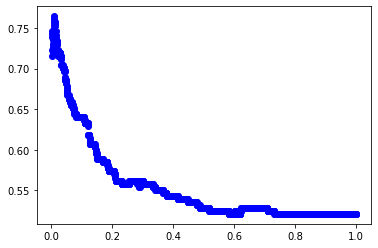

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


best_score = 0
best_gamma = 0

fig, ax = plt.subplots(1)

for g in np.linspace(0.001, 1, 2000):  #iterate over values for g in order to find optimal gamma parameter
    sv = SVC(gamma = g) #instantiate SVC model
    cv_score = cross_val_score(sv, X_train, y_train, cv = 10).mean() #get mean of 10-fold cross validation
    ax.scatter(g, cv_score, color = "blue") #plot gamma parameter against cv score
    if cv_score > best_score: 
        best_score = cv_score #keep track of optimal cv score
        best_gamma = g #keep track of optimal gamma parameter

print(best_score, best_gamma)
                

At this point, I am at the part of the process where I want to determine the optimal complexity of the model that is controlled by the gamma parameter within the SVC model. Cross validation using the cross_val_score() function allows me to get a picture of how my model might perform on real data, or in this case my test set. I iterated over a range of numbers and kept track of the best cross validation score and the corresponding gamma parameter that contributed to it. After iterating through 2000 possible parameters, I end up with my "optimal" cv score and gamma parameter with an accompanying graph displaying cv scores across different gamma values.

Specifically, I chose to test cv-scores/gamma parameters within the interval [0.001, 1] because through exploration with different ranges of intervals, I came to realize
that increasing the gamma parameter resulted in lower cv scores on both training and test data. At this point,
after testing a large range of gamma values up to 10000, I concluded that numbers past 1 only resulted in lower
cv scores. Knowing this, I attempted to decrease the gamma parameter even past 0.001 as this appeared to be the correct trend, however this resulted in lower cv scores as well. Hence, a gamma parameter around 0.01 appears to be the happy medium and the optimal parameter for my model.

In [7]:
sv = SVC(gamma = 0.009495747873936967) #make SVC model with "optimal" gamma parameter
sv.fit(X_train, y_train) #fit model
sv.score(X_train, y_train), sv.score(X_test, y_test) #score model accuracy

(0.8951310861423221, 0.7014925373134329)

I scored relatively accurate with my predictor/target training data and optimal gamma parameter, and got a score that wasn't too far away with my predictor/target testing data. Because I had tried several other gamma parameters using different intervals for cross validation that all resulted in lower scores, I decided to move on with this gamma value.

In [8]:
#for species: 0 = Adelie, 1 = Chinstrap, 2 = Gentoo
from sklearn.metrics import confusion_matrix

y_train_pred = sv.predict(X_train) #target variable predictions according to training data

c = confusion_matrix(y_train, y_train_pred) #matrix displaying number of correctly/incorrectly predicted species
c 


array([[117,   3,   0],
       [ 21,  30,   3],
       [  0,   1,  92]])

The confusion matrix indicates the number of correctly predicted species along its diagonal and the number of incorrectly predicted species among its other entries. According to the matrix, there were 31 times when the model
incorrectly predicted an Adelie instead of the actual species, Chinstrap, and 1 time when the model incorrectly predicted an Adelie instead of a Gentoo. Furthermore, there were 2 times when the model incorrectly predicted a Chinstrap instead of an Adelie and 1 time when the model incorrectly predicted a Chinstrap instead of a Gentoo. The model also incorrectly predicted 3 Gentoos instead of the correct species, Chinstrap.

In [9]:
mistakes = X_train[y_train != y_train_pred] #get information for penguins that are incorrectly predicted
mistake_labels = y_train[y_train != y_train_pred] #true species of incorrectly predicted penguins
mistake_preds = y_train_pred[y_train != y_train_pred] #predicted species of incorrectly predicted penguins

mistake_preds, mistake_labels, mistakes

(array([0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
        0, 0, 0, 0, 0, 0]),
 array([1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1]),
      Flipper Length (mm)  Body Mass (g)  Sex
 172                181.0         3600.0    0
 191                205.0         4500.0    1
 53                 200.0         4050.0    1
 171                195.0         4400.0    1
 156                197.0         3725.0    1
 164                185.0         3700.0    0
 204                193.0         3600.0    0
 260                208.0         3950.0    0
 215                207.0         4000.0    1
 189                210.0         4800.0    1
 180                191.0         3700.0    0
 145                185.0         3650.0    1
 186                195.0         3600.0    1
 182                187.0         3200.0    0
 174                187.0         2900.0    0
 152                192.0         3500.0    0
 194          

My model results in 38 incorrect predictions. The majority of mistakes within this model include Chinstraps that are incorrectly predicted as Adelies, apparent both within the confusion matrix and when observing the incorrect predictions against what actually should have been predicted, i.e. 0 (Adelie) is predicted when it should be 0 (Chinstrap). According to the measurements of the penguins that were incorectly predicted, the penguins that were predicted as Adelie but should have been Chinstrap were all had very similar measurements for body mass and flipper length, indicating that these measurements were most likely all very similar to the measurements of a standard Adelie penguin and hence predicted incorrectly. There were also several other incorrectly predicted penguins that most likely share this same trait as well.